In [18]:
import os

os.makedirs("samples", exist_ok=True)

prefix = "http://yann.lecun.com/exdb/mnist/"
data = [
    "train-images-idx3-ubyte.gz",
    "train-labels-idx1-ubyte.gz",
    "t10k-images-idx3-ubyte.gz",
    "t10k-labels-idx1-ubyte.gz",
]

for file in data:
    os.system(f"""
                wget {prefix}{file}
                mv {file} samples
                gzip -d samples/{file}
                rm samples/{file}
    """)

--2022-12-28 14:56:37--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

     0K .......... .......... .......... .......... ..........  0% 2.34M 4s
    50K .......... .......... .......... .......... ..........  1% 5.69M 3s
   100K .......... .......... .......... .......... ..........  1% 2.93M 3s
   150K .......... .......... .......... .......... ..........  2% 5.18M 3s
   200K .......... .......... .......... .......... ..........  2% 9.38M 2s
   250K .......... .......... .......... .......... ..........  3% 7.25M 2s
   300K .......... .......... .......... .......... ..........  3% 19.6M 2s
   350K .......... .......... .......... .......... ..........  4% 9.92M 2s
   400K .......... ......

In [19]:
from mnist import MNIST

mndata = MNIST('samples')

train_images, train_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

In [20]:
import numpy as np
from matplotlib import pyplot as plt

images = np.array(train_images)
labels = np.array(train_labels)

mask_0 = labels == 0
images_0 = images[mask_0,:]
mask_1 = labels == 1
images_1 = images[mask_1,:]

reshaped_images_0 = []
for image in images_0:
    reshaped_images_0.append(np.stack((np.pad(image.reshape(28,28), ((2,2),(2,2))),)*3, axis=-1))
images_0 = np.stack(reshaped_images_0, axis=0)

reshaped_images_1 = []
for image in images_1:
    reshaped_images_1.append(np.stack((np.pad(image.reshape(28,28), ((2,2),(2,2))),)*3, axis=-1))
images_1 = np.stack(reshaped_images_1, axis=0)

np.save("train_images_0.npy", images_0)
np.save("train_images_1.npy", images_1)
# plt.imshow(images_1[110])


In [21]:
print(images_0.shape)
print(images_1.shape)

(5923, 32, 32, 3)
(6742, 32, 32, 3)


In [22]:
import numpy as np
from matplotlib import pyplot as plt

images = np.array(test_images)
labels = np.array(test_labels)

mask_0 = labels == 0
images_0 = images[mask_0,:]
mask_1 = labels == 1
images_1 = images[mask_1,:]

reshaped_images_0 = []
for image in images_0:
    reshaped_images_0.append(np.stack((np.pad(image.reshape(28,28), ((2,2),(2,2))),)*3, axis=-1))
images_0 = np.stack(reshaped_images_0, axis=0)

reshaped_images_1 = []
for image in images_1:
    reshaped_images_1.append(np.stack((np.pad(image.reshape(28,28), ((2,2),(2,2))),)*3, axis=-1))
images_1 = np.stack(reshaped_images_1, axis=0)

np.save("test_images_0.npy", images_0)
np.save("test_images_1.npy", images_1)

In [23]:
print(images_0.shape)
print(images_1.shape)

(980, 32, 32, 3)
(1135, 32, 32, 3)


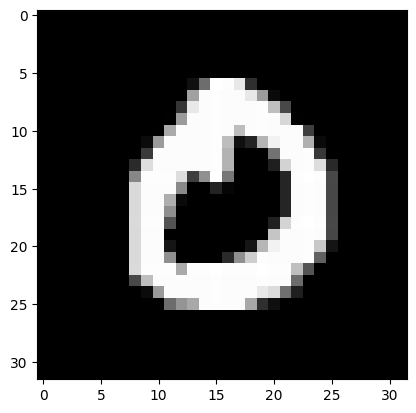

In [24]:
plt.imshow(images_0[100])